## Shopify Technical Challenge

### Oscar Lewis


Question 1: Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.
What metric would you report for this dataset?
What is its value?


#### Data Investigation


In [92]:
# Include Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import time
import altair as alt
import warnings

warnings.filterwarnings("ignore", message="FixedFormatter")


In [3]:
data = pd.read_csv("sales_data.csv")
data.head()


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


#### Question 1a:

Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.


The first step I take when looking at a new dataset is to visualize the distribution of the data. This allows me to begin to identify any outliers and helps to inform later decisions. During this time I will also check for any null values, as those could be throwing off our observations.


In [4]:
data.shape


(5000, 7)

In [5]:
data.isnull().sum()


order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

As we can see above, there are no null values in the dataset. Next I will use seaborn to graph


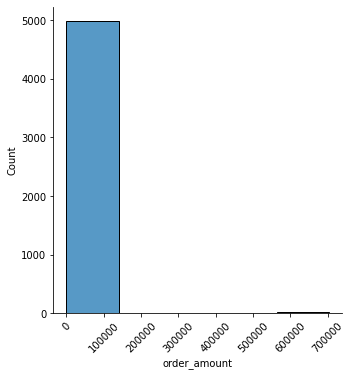

In [6]:
dis_graph = sns.displot(data, x="order_amount", bins=5)
for axes in dis_graph.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45)


Let's take a look at some descriptive statistics about our sales data.


In [7]:
data.order_amount.describe()


count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

In [8]:
print(f"Standard deviation of order_amount is: {data.order_amount.std()}")


Standard deviation of order_amount is: 41282.539348788036


This is a very high standard deviation of AOV which indicates that we have values that are very distant from the mean sneaker price in our dataset.


In [9]:
print(f"Median value of order_amount is: {data.order_amount.median()}")
print(f"Min value of order_amount is: {data.order_amount.min()}")
print(f"Max value of order_amount is: {data.order_amount.max()}")


Median value of order_amount is: 284.0
Min value of order_amount is: 90
Max value of order_amount is: 704000


As we can see above, the max order_value is $704,000. This is significantly more expensive than both the median and minimum order values! This inidicates that the distribution of our order values is very wide and might contain some ouitlier values. We can visualize the distribution to investigate this further.


Since we are interested in finding outliers, I decided to arrange the data according to shop_id. This allows us to more easily identify any patterns in what price tiers different shops are selling sneakers in.


<AxesSubplot:xlabel='shop_id', ylabel='order_amount'>

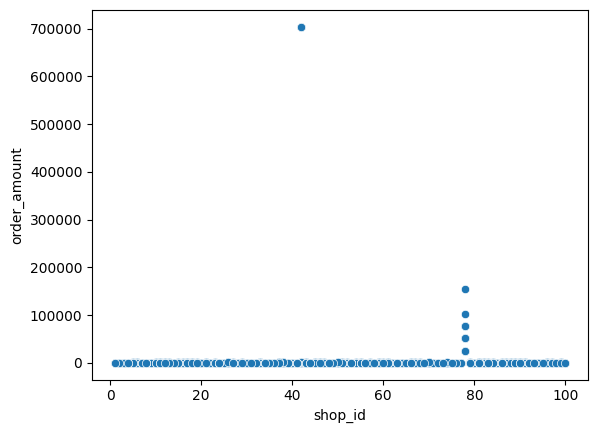

In [12]:
sns.scatterplot(data=data, y="order_amount", x="shop_id")


In [27]:
print(data[data["order_amount"] > 5000]["shop_id"].unique())


[42 78]


The only two shops that have sold an order of sneakers for over $5,000 are shop numbers 42 & 78. It is reasonble to assume that there is a good chance one, or both, of these are the outliers we are looking for.


The first 'suspicious' shop_id is shop #42. This shop regularly sells the single highest priced orders in this dataset. Each time the shop sells one of their $704,000 orders, the total_items amount is always exactly 2,000 while their other non-max orders have a more normal range of total_items.


In [31]:
print(data[data["shop_id"] == 42].head())


     order_id  shop_id  user_id  order_amount  total_items payment_method  \
15         16       42      607        704000         2000    credit_card   
40         41       42      793           352            1    credit_card   
60         61       42      607        704000         2000    credit_card   
308       309       42      770           352            1    credit_card   
409       410       42      904           704            2    credit_card   

              created_at  
15    2017-03-07 4:00:00  
40   2017-03-24 14:15:41  
60    2017-03-04 4:00:00  
308  2017-03-11 18:14:39  
409  2017-03-04 14:32:58  


In [42]:
print(
    f"There are {len(data.query('order_amount > 5000 and shop_id == 42'))} orders above $5,000 from the shop with shop_id = 42. This shop has also has sold {len(data.query('total_items == 2000 and shop_id == 42'))} orders that each contained exactly 2,000 totals items."
)


There are 17 orders above $5,000 from the shop with shop_id = 42. This shop has also has sold 17 orders that each contained exactly 2,000 totals items.


The other shop we should investigate is hop #78. This shop is consistently selling sneakers for a higher price than the vast majority of other shopify shops.


In [32]:
print(data[data["shop_id"] == 78].head())


     order_id  shop_id  user_id  order_amount  total_items payment_method  \
160       161       78      990         25725            1    credit_card   
490       491       78      936         51450            2          debit   
493       494       78      983         51450            2           cash   
511       512       78      967         51450            2           cash   
617       618       78      760         51450            2           cash   

              created_at  
160   2017-03-12 5:56:57  
490  2017-03-26 17:08:19  
493  2017-03-16 21:39:35  
511   2017-03-09 7:23:14  
617  2017-03-18 11:18:42  


In [45]:
print(
    f"There are {len(data.query('order_amount > 2500 and shop_id == 78'))} orders above $2,500 from the shop with shop_id = 78."
)


There are 46 orders above $2,500 from the shop with shop_id = 78.


##### Shop# 42 Investigation:


In [128]:
shop_42_df = data.loc[data['shop_id'] == 42]
alt.Chart(shop_42_df).mark_point().encode(
    x=alt.X('created_at:T', axis=alt.Axis(format='%d, %b, %Y', title="Time Order was Created")),
    y=alt.Y('order_amount:Q', axis=alt.Axis(format='$.2f'), title="Order Amount (dollars)"),
    color = alt.Color('total_items', scale=alt.Scale(scheme='teals')),
    tooltip=['order_id', 'total_items', 'order_amount', alt.Tooltip('monthdate(created_at):T', title="created_at")]
).properties(
    title='Orders from Shop #42'
).interactive()


alt.Chart(...)

From the above interactive visualization 